## <center> Графические возможности библиотеки pandas

In [2]:
import pandas as pd

In [3]:
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Основным методом для создания простейших графиков в Pandas является метод plot(). Разберем его основные параметры:
* x - название признака, который будет отложен по оси абсцисс
* y - название признака, который будет отложен по оси ординат
* figsize - размер графика (кортеж из ширины и высоты в дюймах)
* **kind** - тип визуализации. Основные типы:
    * 'line' - линейный график (стоит по умолчанию)
    * 'bar' - столбчатая диаграмма
    * 'barh' - горизонтальная столбчатая диаграмма
    * 'hist' - гистограмма
    * 'box' - коробчатая диаграмма (boxplot)
    * 'pie' - круговая диаграмма
    * 'scatter' - диаграмма рассеяния
* grid - отображение сетки (по умолчанию False)
* legend - отображение легенды (по умолчанию False)
* title - название графика
* color - цвет


date
2020-01-22         0.0
2020-01-23       537.0
2020-01-24      -158.0
2020-01-25       495.0
2020-01-26       680.0
                ...   
2021-05-25    531845.0
2021-05-26    568216.0
2021-05-27    554368.0
2021-05-28    499934.0
2021-05-29    480835.0
Name: daily_confirmed, Length: 494, dtype: float64

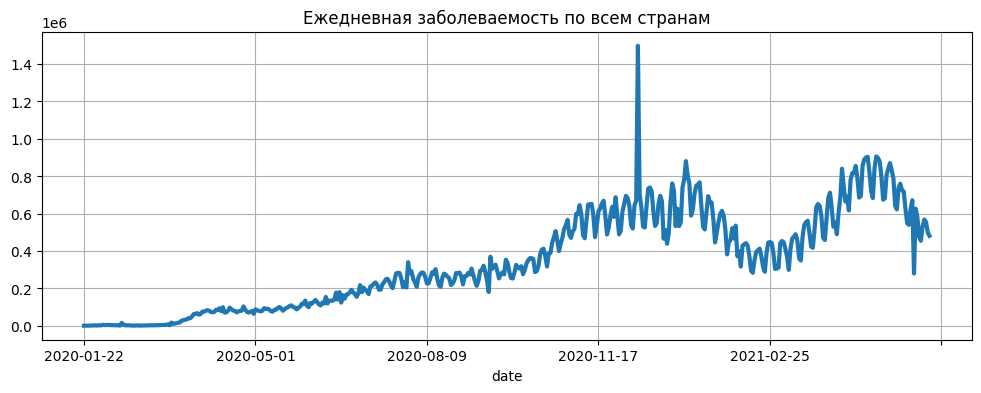

In [11]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
)
display(grouped_cases)

**Выводы по графику:** на графике отчетливо виден умеренный начальный рост заболеваемости, после чего наблюдается ее резкое повышение в середине октября 2020, а в декабре 2020 года вспышка коронавируса (зафиксировано более 1.4 млн заболевших в день). После чего наблюдается постепенное уменьшение числа ежедневно фиксированных случаев и наступление второй волны в марте 2021. Наконец, начиная с мая 2021 наблюдается очередной спад.

Пилообразность графика - подъемы и спады с периодом в 7 дней - могут быть связаны с рабочими и выходными днями.
Нам неизвестно, как  устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что спад в выходные обусловлен меньшей интенсивностью работы медицинских служб. Также можно предположить, что в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берется/проводится меньше тестов, к понедельнику они еще не готовы и диагноз еще не поставлен. Также можем предположить, что минимум в понедельник может быть запаздыванием подсчета статистики, т.е. на самом деле данные за понедельник - это данные за воскресенье


Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

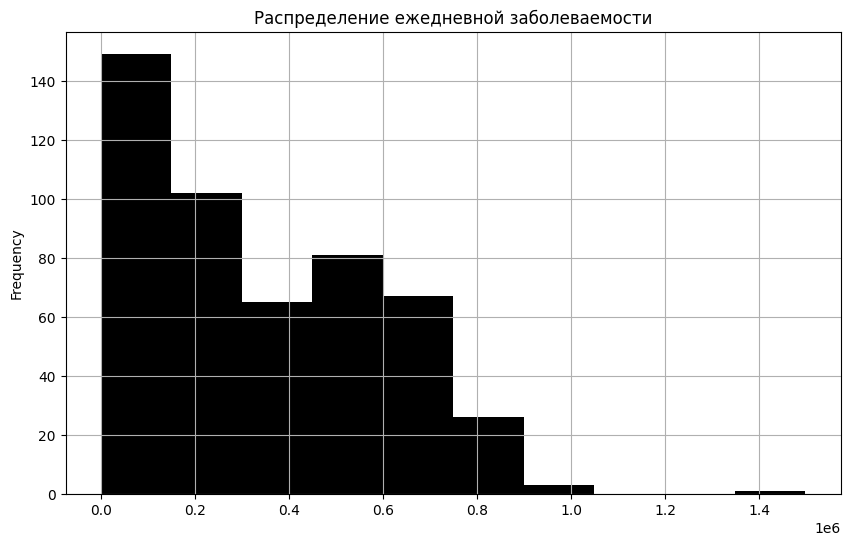

In [5]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

**Выводы по графику:** по гистограмме можно судить о частоте попадания ежедневной заболеваемости в определенный интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн. человек), разбитый на 10 равных интервалов. На оси ординат - число наблюдений, попавших в этот интервал.

Во-первых, мы видим модальное значение близ нуля (от 0 до примерно 150 тыс. заболеваний в день), т.е. большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.

Во-вторых, в глаза бросается "пенёк", который соответствует резкой вспышке заболеваемости, которую мы видели ранее, его высота очень мала, ведь такое наблюдение единственно. Даже на гистограмме кажется, что данное наблюдение является аномальным и скорее всего является выбросом.

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

country
United States     33251939.0
India             27894800.0
Brazil            16471600.0
France             5719877.0
Turkey             5235978.0
Russia             4995613.0
United Kingdom     4496823.0
Italy              4213055.0
Argentina          3732263.0
Germany            3684672.0
Name: confirmed, dtype: float64

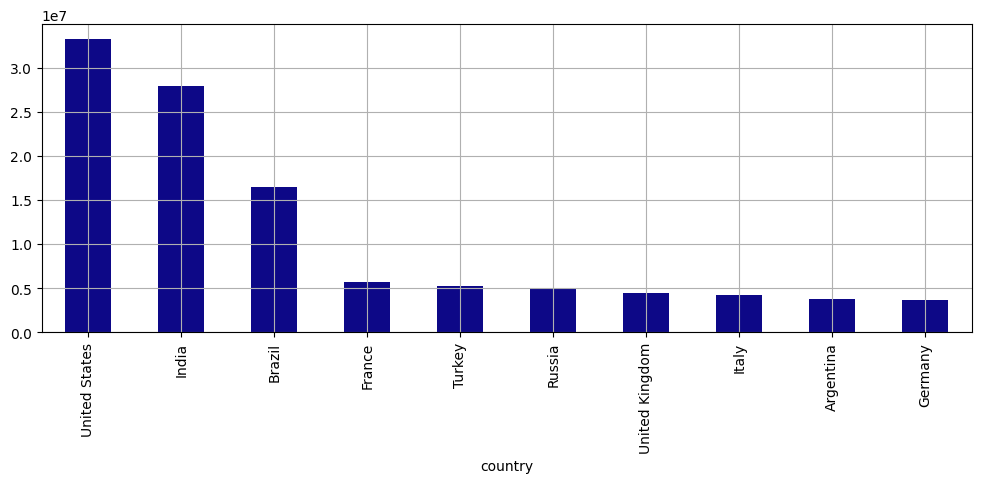

In [12]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
)
display(grouped_country)

* `covid_df.groupby(['country'])['confirmed'].last()` группирует DataFrame `covid_df` по столбцу `country` и для каждой группы выбирает последнее значение столбца `confirmed`. Эта операция создает Series `grouped_country`, содержащую последние подтвержденные случаи заражения COVID-19 для каждой страны.

**Строка 2:**

* `grouped_country = grouped_country.nlargest(10)` сортирует Series `grouped_country` в порядке убывания и выбирает первые 10 стран с наибольшим количеством подтвержденных случаев COVID-19.

**Строка 3:**

* `grouped_country.plot(...):` строит гистограмму, используя данные из `grouped_country`.

**Строка 4:**

* `kind='bar'` указывает, что необходимо построить гистограмму.
* `grid=True` включает сетку на графике.
* `figsize=(12, 4)` задает размер графика (в дюймах).
* `colormap='plasma'` определяет цветовую схему для графика.

**Строка 5:**

* `display(grouped_country)` отображает Series `grouped_country` с ее значениями.

**Выводы по графику:** на диаграмме видно, что лидерами по числу заболевших являются Соединенные Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаково.

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

,confirmed,deaths
country,,
United States,33251939.0,594306.0
India,27894800.0,325972.0
Brazil,16471600.0,461057.0
France,5719877.0,109518.0
Turkey,5235978.0,47271.0
Russia,4995613.0,118781.0
United Kingdom,4496823.0,128037.0
Italy,4213055.0,126002.0
Argentina,3732263.0,77108.0


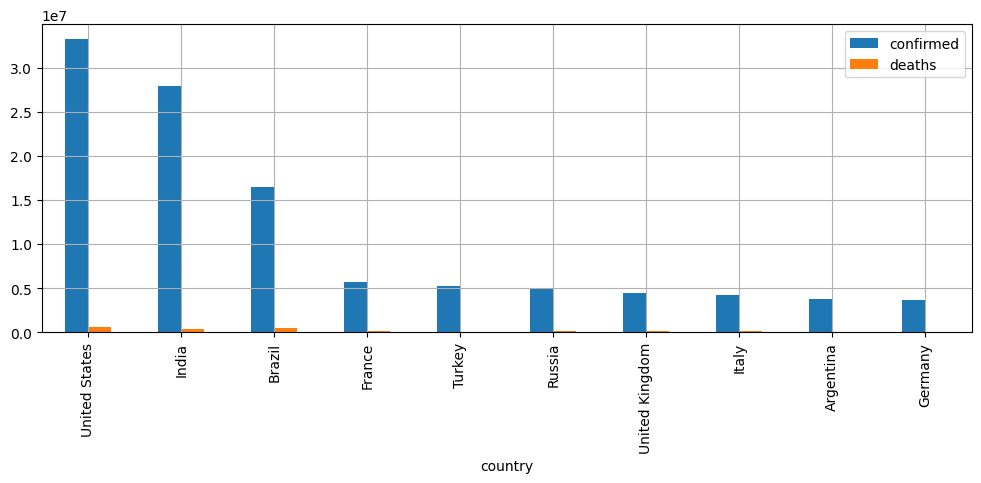

In [13]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True
)
display(grouped_country)

**Выводы по графику:** график является небольшим усовершенствованием предыдущего. Теперь на графике можно увидеть соотношение числа зафиксированных случаев и смертей. 
Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это косвенно может говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие- по клинической картине, учитывающей и другие показатели). Это с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идален).


Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить "здесь и сейчас", не сильно заморачиваясь над их внешним видом. Однако, такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации - довольно ограниченный функционал:
* С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации он не подходит
* Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах
* Сложно или иногда даже невозможно корректировать внешний вид графика 
* Отсутствует 3D визуализация


Задание 4.3

date
2020-01-22        0.0
2020-01-23       17.0
2020-01-24       -8.0
2020-01-25       16.0
2020-01-26       14.0
               ...   
2021-05-25    12752.0
2021-05-26    12756.0
2021-05-27    12753.0
2021-05-28    11820.0
2021-05-29    10502.0
Name: daily_deaths, Length: 494, dtype: float64

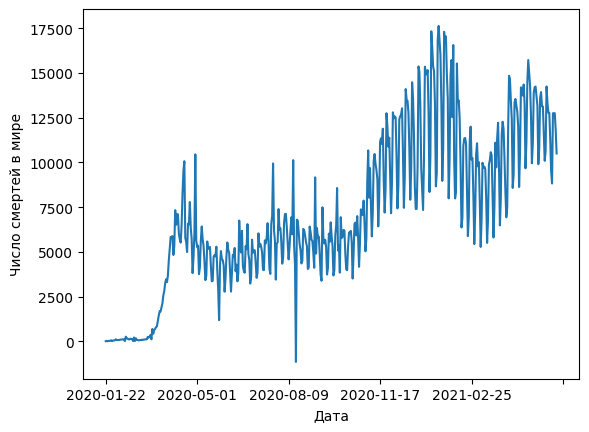

In [9]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире')
display(grouped_cases)

Задание 4.4
С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)?
В данном задании мы используем метод nsmallest(), который позволяет выбрать n наименьших значений в Series, а также метод last(), с помощью которого можно получить последнее непустое значение в группа

<Axes: xlabel='country'>

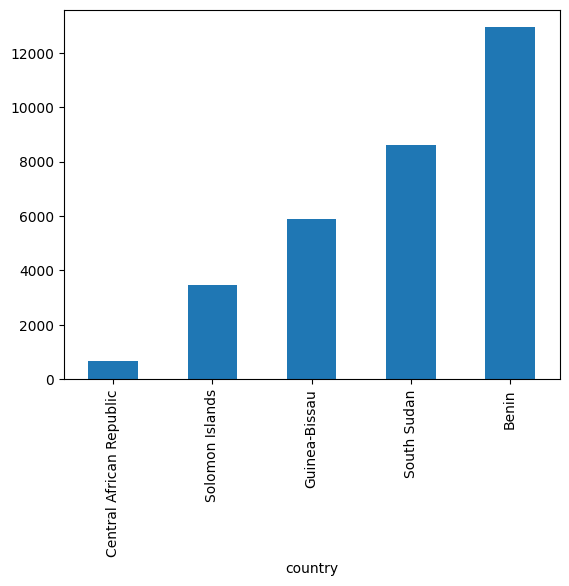

In [16]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')